In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bike = pd.read_csv("/Users/apple/Downloads/SupML/Project/Bike-Sharing-Dataset/hour.csv")

bike_new = bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [2]:
def split(X, prop = [0.6,0.2,0.2], shuffle=False):
    df_index = np.arange(X.shape[0])
    if shuffle==True:
        np.random.shuffle(df_index)
    cut1 = int(np.floor(X.shape[0]*prop[0]))
    cut2 = int(np.floor(X.shape[0]*(prop[0]+prop[1])))
    train_index = df_index[:cut1]
    val_index = df_index[cut1:cut2]
    test_index = df_index[cut2:]
    X_train = X.iloc[train_index]
    X_val = X.iloc[val_index]
    X_test = X.iloc[test_index]
    return [X_train, X_val, X_test]


In [3]:
bike_train, bike_val, bike_test = split(bike_new, [0.6,0.2,0.2])

bike_train_X = np.array(bike_train.drop(['cnt'], axis=1))
bike_train_Y = np.array(bike_train.loc[:,'cnt'])
bike_train_Y.shape = (bike_train_Y.shape[0], 1)

bike_val_X = np.array(bike_val.drop(['cnt'], axis=1))
bike_val_Y = np.array(bike_val.loc[:,'cnt'])
bike_val_Y.shape = (bike_val_Y.shape[0], 1)

bike_test_X = np.array(bike_test.drop(['cnt'], axis=1))
bike_test_Y = np.array(bike_test.loc[:,'cnt'])
bike_test_Y.shape = (bike_test_Y.shape[0], 1)

In [4]:
class ridge_regression(object):
    
    def __init__(self, alpha, lmda, iterations, intercept):
        self.alpha = alpha
        self.lmda = lmda
        self.iterations = iterations
        self.intercept = intercept

    def grad_reg(self, X, Y, print_cost=False):
        cost_list = []
        theta=np.zeros((X.shape[1],1))
        if self.intercept == True:
            X = np.column_stack((np.ones((X.shape[0],1)), X))
            theta=np.zeros((X.shape[1],1))
        for i in range(self.iterations):
            y_pred = np.dot(X, theta)
            theta = theta - 2*self.alpha*np.dot(X.T, (y_pred-Y)) - 2*self.alpha*self.lmda*theta
            ridge_loss = self.compute_loss(y_pred, Y, theta)
            cost_list.append(ridge_loss)
            if print_cost==True:
                if i%2000 == 0:
                    print(ridge_loss/X.shape[0])
        return [cost_list, theta]
    
    def compute_loss(self, y_pred, y_trn, theta):
        loss = np.sum((y_pred-y_trn)**2) + self.lmda*np.sum(theta**2)
        return loss
    
    def predict(self, X, theta, intercept= True):
        if self.intercept == True:
            X = np.column_stack((np.ones((X.shape[0],1)), X))
        y_pred = np.dot(X, theta)
        return y_pred
    
    def RMSE(self, y_pred, y_true):
        return np.sqrt(np.mean((y_pred-y_true)**2))
    
    def MAE(self, y_pred, y_true):
        return np.mean(np.abs(y_pred-y_true))
        

In [12]:
# Hyperparameter tuning
for alp in [0.0000001, 0.0000002, 0.0000003, 0.0000004, 0.00000001]:
    ridge = ridge_regression(alpha= alp, lmda=0.2, iterations=30000, intercept=True)
    _ , theta = ridge.grad_reg(bike_train_X, bike_train_Y)
    y_train_pred = ridge.predict(bike_train_X, theta)
    y_val_pred = ridge.predict(bike_val_X, theta)
    print("alpha=",alp)
    print("Train error:", str(ridge.RMSE(y_train_pred, bike_train_Y)))
    print("Validation error:", str(ridge.RMSE(y_val_pred, bike_val_Y)))
    print("---------------------------------------")        

alpha= 1e-07
Train error: 107.500683106
Validation error: 185.677207705
---------------------------------------


KeyboardInterrupt: 

In [7]:
for lmd in [50, 25, 10, 5, 1, 0.1, 0.2, 0.01, 0.001, 0.00001]:
    ridge = ridge_regression(alpha= 4e-07, lmda=lmd, iterations=30000, intercept=True)
    _ , theta = ridge.grad_reg(bike_train_X, bike_train_Y)
    y_train_pred = ridge.predict(bike_train_X, theta)
    y_val_pred = ridge.predict(bike_val_X, theta)
    print("lambda=",lmd)
    print("Train error:", str(ridge.RMSE(y_train_pred, bike_train_Y)))
    print("Validation error:", str(ridge.RMSE(y_val_pred, bike_val_Y)))
    print("---------------------------------------")

lambda= 50
Train error: 112.751161856
Validation error: 203.658654663
---------------------------------------
lambda= 25
Train error: 112.702570497
Validation error: 203.484034427
---------------------------------------
lambda= 10
Train error: 112.673320441
Validation error: 203.378624959
---------------------------------------
lambda= 5
Train error: 112.663554841
Validation error: 203.343382282
---------------------------------------
lambda= 1
Train error: 112.655736809
Validation error: 203.315149922
---------------------------------------
lambda= 0.1
Train error: 112.653977075
Validation error: 203.30879296
---------------------------------------
lambda= 0.2
Train error: 112.654172613
Validation error: 203.309499374
---------------------------------------
lambda= 0.01
Train error: 112.653801088
Validation error: 203.308157169
---------------------------------------
lambda= 0.001
Train error: 112.653783489
Validation error: 203.308093589
---------------------------------------
lambda

In [15]:
for ite in [15000, 30000, 40000]:
    ridge = ridge_regression(alpha= 4e-07, lmda=0.2, iterations=ite, intercept=True)
    _ , theta = ridge.grad_reg(bike_train_X, bike_train_Y)
    y_train_pred = ridge.predict(bike_train_X, theta)
    y_val_pred = ridge.predict(bike_val_X, theta)
    print("lambda=",lmd)
    print("Train error:", str(ridge.RMSE(y_train_pred, bike_train_Y)))
    print("Validation error:", str(ridge.RMSE(y_val_pred, bike_val_Y)))
    print("---------------------------------------")

KeyboardInterrupt: 

In [15]:
# Optimized hyperparameter values
ridge = ridge_regression(alpha= 0.0000004, lmda=0.2, iterations=30000, intercept=True)
cost_list, theta = ridge.grad_reg(bike_train_X, bike_train_Y, print_cost=True)


39087.1244178
12086.8332775
11679.4638009
11579.8124543
11553.5603401
11546.0740364
11543.6520578
11542.7117558
11542.264915
11542.0139917
11541.8564392
11541.7503049
11541.6752729
11541.6201331
11541.5781444


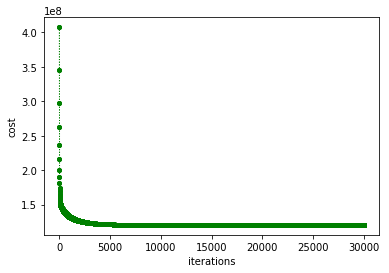

In [34]:
# Cost function as 
plt.plot(range(30000), cost_list, color='green', marker='.', linestyle='dotted',
        linewidth=1, markersize=8)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [35]:
from sklearn.linear_model import Ridge
ridge_skl = Ridge(alpha=0.001, max_iter=30000)
ridge_skl.fit(X=bike_train_X, y=bike_train_Y) 

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=30000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
# Train predictions
y_train_pred = ridge.predict(bike_train_X, theta)
y_train_pred_skl = ridge_skl.predict(X=bike_train_X)

# Validation predictions
y_val_pred = ridge.predict(bike_val_X, theta)
y_val_pred_skl = ridge_skl.predict(X=bike_val_X)

In [50]:
print("Train error for custom model:", str(ridge.RMSE(y_train_pred, bike_train_Y)))
print("Train error for skl model:", str(ridge.RMSE(y_train_pred_skl, bike_train_Y)))

print("Validation error for custom model:", str(ridge.RMSE(y_val_pred, bike_val_Y)))
print("Validation error for skl model:", str(ridge.RMSE(y_val_pred_skl, bike_val_Y)))

Train error for custom model: 107.426340235
Train error for skl model: 107.417888071
Validation error for custom model: 184.735040812
Validation error for skl model: 184.735750168


In [51]:
# Test predictions
y_test_pred = ridge.predict(bike_test_X, theta)
y_test_pred_skl = ridge_skl.predict(X=bike_test_X)

print("Test error for custom model:", str(ridge.RMSE(y_test_pred, bike_test_Y)))
print("Test error for skl model:", str(ridge.RMSE(y_test_pred_skl, bike_test_Y)))

Test error for custom model: 187.274444779
Test error for skl model: 187.27814907
